# Principal Component Analysis using Scikit-Learn

#### Python Imports

In [38]:
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [39]:
%matplotlib inline
np.random.seed(101)
plt.style.use('seaborn')

#### For PCA Illustration

In [40]:
f1 = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
f2 = np.array([1.5, 1.0, 1.0, 2.7, 3.2, 3.1, 4.5, 4.8])

In [41]:
def pca_2d_plot(s=1):
    plt.scatter(f1, f2, color='dodgerblue')
    plt.xlim(0, 6)
    plt.ylim(0, 6)
    plt.xlabel('F1')
    plt.ylabel('F2')
    if s > 1:
        lx = np.linspace(0, 6)
        ly = 0.97 * lx
        plt.plot(lx, ly, color='salmon')
    if s > 2:
        vx = [0, 2.0]
        vy = [0, 1.0]
        plt.plot(vx, vy, color='limegreen')
    if s > 3:
        px = [0, 1.70]
        py = [0, 1.60]
        plt.plot([1.70], [1.60], marker='o', color='red')
        plt.plot(px, py, color='blue', linestyle='--')
    plt.show()

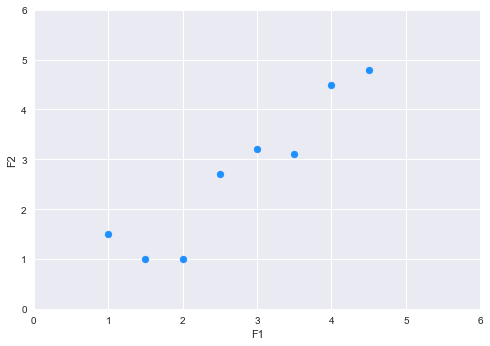

In [42]:
pca_2d_plot()

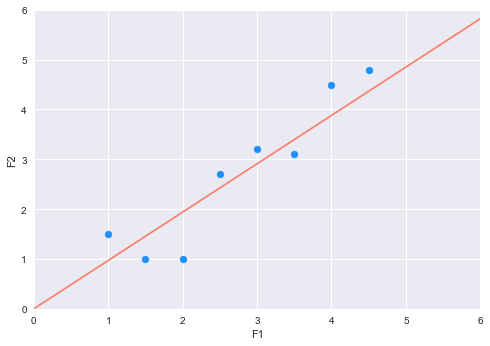

In [43]:
pca_2d_plot(2)

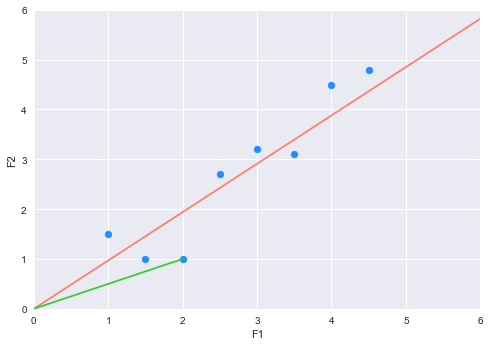

In [44]:
pca_2d_plot(3)

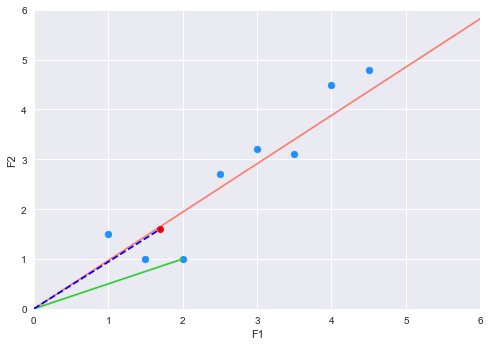

In [45]:
pca_2d_plot(4)

#### For Understanding PCA Algorithm

In [46]:
x1 = np.array([4, 8, 4, 4, 1, 6, 1, 5, 3])
x2 = np.array([3, 1, 1, 3, 2, 1, 2, 3, 2])
x3 = np.array([7, 9, 5, 7, 3, 7, 3, 8, 5])

In [47]:
u1 = np.mean(x1)
u2 = np.mean(x2)
u3 = np.mean(x3)
print(u1, u2, u3)

4.0 2.0 6.0


In [48]:
s1 = np.std(x1, ddof=1)
s2 = np.std(x2, ddof=1)
s3 = np.std(x3, ddof=1)
print(s1, s2, s3)

2.23606797749979 0.8660254037844386 2.1213203435596424


In [49]:
n1 = (x1 - u1)/s1
n1

array([ 0.        ,  1.78885438,  0.        ,  0.        , -1.34164079,
        0.89442719, -1.34164079,  0.4472136 , -0.4472136 ])

In [50]:
n2 = (x2 - u2)/s2
n2

array([ 1.15470054, -1.15470054, -1.15470054,  1.15470054,  0.        ,
       -1.15470054,  0.        ,  1.15470054,  0.        ])

In [51]:
n3 = (x3 - u3)/s3
n3

array([ 0.47140452,  1.41421356, -0.47140452,  0.47140452, -1.41421356,
        0.47140452, -1.41421356,  0.94280904, -0.47140452])

In [52]:
np.cov(n1, n2)

array([[ 1.        , -0.32274861],
       [-0.32274861,  1.        ]])

In [53]:
np.cov(n2, n3)

array([[1.        , 0.06804138],
       [0.06804138, 1.        ]])

In [54]:
np.cov(n1, n3)

array([[1.        , 0.92233098],
       [0.92233098, 1.        ]])

In [55]:
A = np.array([[1.0, -0.32, 0.92], [-0.32, 1.0, 0.68], [0.92, 0.68, 1.0]])

In [56]:
L, S = eig(A)

In [57]:
L

array([-0.31025815,  2.00672214,  1.30353601])

In [58]:
S

array([[ 0.5792002 ,  0.58158706, -0.57121241],
       [ 0.48246778,  0.32024195,  0.81527292],
       [-0.65707836,  0.74779782,  0.09511282]])

#### Load the Auto MPG Data Set
Source: [UCI Machine Learning Repository - Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [59]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
auto_df = pd.read_csv(url, delim_whitespace=True)
auto_df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


#### Fix data types, drop unwanted columns, and drop rows with null values

In [60]:
auto_df.horsepower = pd.to_numeric(auto_df.horsepower, errors='coerce')
auto_df.car_name = auto_df.car_name.astype('string')
auto_df = auto_df.drop(['model_year', 'origin', 'car_name'], axis=1)
auto_df = auto_df[auto_df.horsepower.notnull()]
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,15.0,8,350.0,165.0,3693.0,11.5
1,18.0,8,318.0,150.0,3436.0,11.0
2,16.0,8,304.0,150.0,3433.0,12.0
3,17.0,8,302.0,140.0,3449.0,10.5
4,15.0,8,429.0,198.0,4341.0,10.0
...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6
393,44.0,4,97.0,52.0,2130.0,24.6
394,32.0,4,135.0,84.0,2295.0,11.6
395,28.0,4,120.0,79.0,2625.0,18.6


#### Create the traing and test data sets

In [61]:
X_train, X_test, y_train, y_test = train_test_split(auto_df[['acceleration', 'cylinders', 'displacement', 'horsepower', 'weight']], auto_df['mpg'], test_size=0.25, random_state=101)
X_train

,acceleration,cylinders,displacement,horsepower,weight
110,13.5,3,70.0,90.0,2124.0
253,15.8,6,200.0,85.0,2965.0
16,16.0,6,200.0,85.0,2587.0
115,9.5,8,400.0,230.0,4278.0
37,12.0,8,350.0,165.0,4209.0
...,...,...,...,...,...
64,13.0,8,351.0,153.0,4129.0
328,13.8,4,91.0,67.0,1850.0
341,12.9,4,135.0,84.0,2385.0
11,9.5,8,400.0,150.0,3761.0


#### Standardize the training and test data set

In [62]:
scaler = StandardScaler()
s_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
s_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

#### Perform PCA on the scaled training and test data set

In [77]:
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
pca = PCA(random_state=101)
r_X_train = pd.DataFrame(pca.fit_transform(s_X_train), columns=columns, index=s_X_train.index)
r_X_test = pd.DataFrame(pca.transform(s_X_test), columns=columns, index=s_X_test.index)
r_X_train

,PC1,PC2,PC3,PC4,PC5
110,-1.695227,-1.472689,0.507679,-0.111806,-0.043461
253,-0.124263,0.211064,-0.530299,-0.155845,-0.086999
16,-0.353369,0.128980,-0.668421,0.142251,0.098041
115,4.597148,-1.167264,0.840083,0.643436,0.305585
37,3.235202,-0.273101,-0.011427,0.000530,-0.035288
...,...,...,...,...,...
64,2.932666,0.058037,-0.186252,-0.035480,0.030945
328,-1.787559,-1.252311,-0.386346,-0.055600,-0.006902
341,-0.977156,-1.311929,-0.035825,-0.346061,0.071450
11,3.326797,-1.126988,-0.672162,-0.224741,0.470224


#### Display variance explained by each principal component

In [69]:
pca.explained_variance_ratio_

array([0.80839537, 0.14586112, 0.02674446, 0.01213278, 0.00686627])

In [78]:
drop_columns = ['PC3', 'PC4', 'PC5']
r_X_train2 = r_X_train.drop(drop_columns, axis=1)
r_X_test2 = r_X_test.drop(drop_columns, axis=1)
r_X_train2

,PC1,PC2
110,-1.695227,-1.472689
253,-0.124263,0.211064
16,-0.353369,0.128980
115,4.597148,-1.167264
37,3.235202,-0.273101
...,...,...
64,2.932666,0.058037
328,-1.787559,-1.252311
341,-0.977156,-1.311929
11,3.326797,-1.126988


#### Initialize and fit the Linear Regression model (using the principal components)

In [79]:
model = LinearRegression(fit_intercept=True)
model.fit(r_X_train2, y_train)

LinearRegression()

#### Predict outcomes using the test data

In [75]:
y_predict = model.predict(r_X_test2)

#### Display the R2 Score

In [80]:
r2_score(y_test, y_predict)

0.7113863270625891